### Step 0 : Load the data

In [26]:

import pandas as pd

file_path = r"C:\Users\tlili\OneDrive\Bureau\Bootcamp\labs\project-2-eda-sql-insurance\Insurance claims data.csv"
df = pd.read_csv(file_path)


### Step 1: check the data

In [27]:
# Check the first rows
df.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [29]:
df.shape

(58592, 41)

In [30]:
#check the missing values 
(df.isnull().sum())


policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

### insights:
 our data set is complete does not represent any missing values 

In [31]:
#check duplicates 
(df.duplicated().sum())

np.int64(0)

### insights:
 our data set does not represent any duplicated rows but that is not sufficent , let's check if there is duplicated policies

In [32]:
#check the duplicated policies 
(df.duplicated('policy_id').sum())

np.int64(0)

### insights:
 all the policies are unique and we can concider the policy_id as a unique id 

In [33]:
#data type check 
(df.dtypes)

policy_id                            object
subscription_length                 float64
vehicle_age                         float64
customer_age                          int64
region_code                          object
region_density                        int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type                    object
steering_type                   

### insights:
the elements are correctly typed 

In [34]:
#identify which columns are likely categorical
(df.nunique())

policy_id                           58592
subscription_length                   140
vehicle_age                            49
customer_age                           41
region_code                            22
region_density                         22
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
airbags                                 3
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
displacement                            9
cylinder                                2
transmission_type                       2
steering_type                           3
turning_radius                    

In [35]:
#Invalid or extreme values
df.describe(include="all").round(2)

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
count,58592,58592.00,58592.00,58592.00,58592,58592.00,58592,58592,58592,58592,...,58592,58592,58592,58592,58592,58592,58592,58592,58592.00,58592.00
unique,58592,NaN,NaN,NaN,22,NaN,6,11,3,9,...,2,2,2,2,2,2,2,2,NaN,NaN
top,POL020760,NaN,NaN,NaN,C8,NaN,B2,M1,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,NaN,NaN
freq,1,NaN,NaN,NaN,13654,NaN,18314,14948,20532,17796,...,32177,42435,42435,57383,34291,36309,42435,58229,NaN,NaN
mean,NaN,6.11,1.39,44.82,NaN,18826.86,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.76,0.06
std,NaN,4.14,1.13,6.94,NaN,17660.17,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.39,0.24
min,NaN,0.00,0.00,35.00,NaN,290.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00
25%,NaN,2.10,0.40,39.00,NaN,6112.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00
50%,NaN,5.70,1.20,44.00,NaN,8794.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,0.00
75%,NaN,10.40,2.20,49.00,NaN,27003.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,0.00


### insights:
Since the minimum value of car age is 0, this indicates that the dataset includes cars that are brand new or not yet in use

The minimum subscription length is 0, which indicates that some contracts have not been activated yet

the claim_status column is showing Nan unique values , but according to the (df.nunique()) function there is 2 uniques values 1 and 0 

In [36]:
# check how many cars are not in use 
not_in_use_cars = (df['vehicle_age'] == 0).sum()
print(f'There are {not_in_use_cars} cars that are not in use.')
# check what is the percentage of the not in use cars
percentage_not_in_use_cars = (((not_in_use_cars / df.shape[0])*100).round(2))
print(f'the percentage of the not in use cars is {percentage_not_in_use_cars}')

There are 5257 cars that are not in use.
the percentage of the not in use cars is 8.97


In [37]:
#let's investiate more about the unused cars to make they are really unused 
df[df['vehicle_age'] == 0].head(10)

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
13,POL002844,1.4,0.0,44,C2,27003,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
25,POL050788,1.3,0.0,46,C3,4076,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
28,POL028528,0.7,0.0,37,C3,4076,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
31,POL039202,7.7,0.0,45,C3,4076,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
47,POL025380,2.7,0.0,49,C3,4076,Utility,M10,CNG,85Nm@3000rpm,...,No,No,No,No,No,No,No,Yes,0,0
61,POL013657,0.6,0.0,49,C13,5410,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
84,POL043686,1.1,0.0,53,C3,4076,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,1
87,POL048143,0.1,0.0,53,C3,4076,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
103,POL036840,5.7,0.0,40,C12,34791,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,1
106,POL035335,0.8,0.0,54,C10,73430,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0


### insights 
some of the not used cars or brand new cars filled a claim , they have valid and active policy and real owners 

these cars are not invalid data they are legitimate new vehicles and a segment to include in the EDA 

In [38]:
# check how many subscription are not activated yet 
not_activated_policies = (df['subscription_length'] == 0).sum()
print(f'There are {not_activated_policies} subscriptions that are not activated yet.')
# check what is the percentage of these policies
percentage_not_activated_policies = (((not_activated_policies/ df.shape[0])*100).round(2))
print(f'the percentage of the not activated policies is {percentage_not_activated_policies}')

There are 276 subscriptions that are not activated yet.
the percentage of the not activated policies is 0.47


In [39]:
#let's investiate more about the not activated policies to make they are really not activated
df[df['subscription_length'] == 0].head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
149,POL051694,0.0,0.8,47,C13,5410,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1493,POL001560,0.0,0.0,39,C3,4076,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
1513,POL011444,0.0,2.6,40,C13,5410,B2,M7,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,0
2028,POL034031,0.0,2.4,39,C13,5410,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
2165,POL033834,0.0,0.0,45,C15,290,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0


### insights 



In [40]:
df['subscription_length'].describe()

count    58592.000000
mean         6.111688
std          4.142790
min          0.000000
25%          2.100000
50%          5.700000
75%         10.400000
max         14.000000
Name: subscription_length, dtype: float64

### step 4 : cleaning the dataset 

In [41]:
#delete the unnecessairy columns 
df_new = df.drop(['segment', 'max_torque', 'transmission_type','steering_type','turning_radius','gross_weight','is_front_fog_lights','is_rear_window_wiper','is_rear_window_washer','is_rear_window_defogger','is_power_steering'], axis=1)
df_new

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,model,fuel_type,max_power,engine_type,...,width,is_brake_assist,is_power_door_locks,is_central_locking,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,M4,Diesel,113.45bhp@4000rpm,1.5 L U2 CRDi,...,1790,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,M9,Diesel,97.89bhp@3600rpm,i-DTEC,...,1695,No,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,M4,Diesel,113.45bhp@4000rpm,1.5 L U2 CRDi,...,1790,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,M1,CNG,40.36bhp@6000rpm,F8D Petrol Engine,...,1515,No,No,No,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,M5,Diesel,88.77bhp@4000rpm,1.5 Turbocharged Revotorq,...,1755,No,Yes,Yes,No,No,Yes,Yes,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,POL019269,10.6,2.6,48,C5,34738,M6,Petrol,88.50bhp@6000rpm,K Series Dual jet,...,1735,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58588,POL001254,2.3,2.2,37,C3,4076,M4,Diesel,113.45bhp@4000rpm,1.5 L U2 CRDi,...,1790,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
58589,POL019859,6.6,2.2,35,C8,8794,M6,Petrol,88.50bhp@6000rpm,K Series Dual jet,...,1735,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58590,POL014061,4.1,3.6,44,C8,8794,M6,Petrol,88.50bhp@6000rpm,K Series Dual jet,...,1735,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [42]:
#create a new clean csv
df.to_csv("cleaned_data.csv", index=False)

In [43]:
#import the new dataset
import pandas as pd

file_path = r"C:\Users\tlili\OneDrive\Bureau\Bootcamp\labs\project-2-eda-sql-insurance\cleaned_data.csv"
df_cleaned = pd.read_csv(file_path)

In [44]:
df_cleaned. columns

Index(['policy_id', 'subscription_length', 'vehicle_age', 'customer_age',
       'region_code', 'region_density', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'steering_type', 'turning_radius', 'length',
       'width', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'claim_status'],
      dtype='object')

### Step 3: Bivariate EDA (Two Variables at a Time)

In [45]:
safety_features = df[["vehicle_age","is_esc","is_adjustable_steering","is_tpms","is_parking_sensors","is_parking_camera","rear_brakes_type","steering_type","turning_radius","length","width","is_front_fog_lights","is_rear_window_wiper","is_rear_window_washer","is_rear_window_defogger","is_brake_assist","is_power_door_locks","is_central_locking","is_power_steering","is_driver_seat_height_adjustable","is_day_night_rear_view_mirror","is_ecw","is_speed_alert","ncap_rating","claim_status"]]
safety_features.head()

,vehicle_age,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,steering_type,turning_radius,length,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,1.2,Yes,Yes,Yes,Yes,Yes,Disc,Power,5.2,4300,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,1.8,No,Yes,No,Yes,Yes,Drum,Electric,4.9,3995,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,0.2,Yes,Yes,Yes,Yes,Yes,Disc,Power,5.2,4300,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,0.4,No,No,No,Yes,No,Drum,Power,4.6,3445,...,No,No,No,Yes,No,No,No,Yes,0,0
4,1.0,No,Yes,No,Yes,No,Drum,Electric,5.0,3990,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [53]:

import seaborn as sns
import matplotlib.pyplot as plt

df = df_cleaned.copy()  


#### Do young drivers with older vehicles have higher claim rates than older drivers with newer vehicles?

In [54]:
# Step 1: Create age bins
df['driver_age_group'] = pd.cut(df['customer_age'],
                                bins=[0, 25, 40, 60, 100],
                                labels=['<25', '25-40', '40-60', '60+'])

df['vehicle_age_group'] = pd.cut(df['vehicle_age'],
                                 bins=[0, 1, 3, 5, 10, 20],
                                 labels=['<1', '1-3', '3-5', '5-10', '10+'])


In [55]:
# Step 2: Compute claim rate by both groups
claim_rate = df.groupby(['driver_age_group', 'vehicle_age_group'])['claim_status'].mean().unstack() * 100

C:\Users\tlili\AppData\Local\Temp\ipykernel_18336\1327202384.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  claim_rate = df.groupby(['driver_age_group', 'vehicle_age_group'])['claim_status'].mean().unstack() * 100


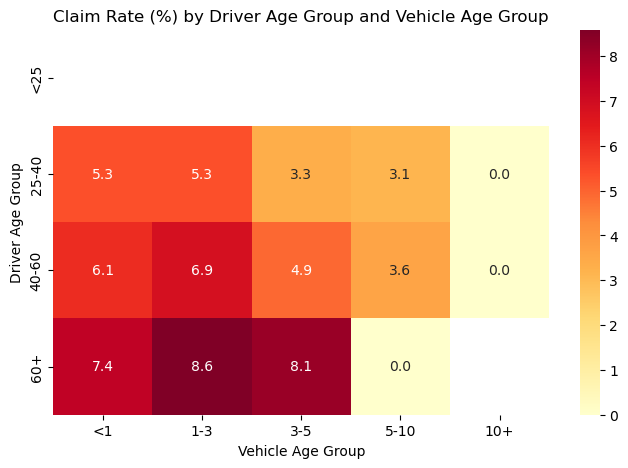

In [56]:
# Step 3: Visualize as heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(claim_rate, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("Claim Rate (%) by Driver Age Group and Vehicle Age Group")
plt.ylabel("Driver Age Group")
plt.xlabel("Vehicle Age Group")
plt.show()

### insights : 

In this dataset, older drivers (60+) show the highest claim rates, even when driving newer vehicles (1 to 3 years old), whereas younger and middle-aged drivers maintain lower claim rates overall and that even with old vehiculs (5 to 10 years old).

This suggests that driver age is a stronger determinant of claim probability than vehicle age.


Missing or zero claim data for very old cars (10+ years) suggests either :

There are few or no policies for cars older than 10 years, or sample size too small to show true pattern.

In [59]:
# Count number of policies per vehicle age group to investigate the missing data for cars older then 10 years 

df_cleaned['vehicle_age_group'] = pd.cut(
    df_cleaned['vehicle_age'],
    bins=[0, 1, 3, 5, 10, 20],
    labels=['<1', '1-3', '3-5', '5-10', '10+']
)

# Optional sanity check
df_cleaned['vehicle_age_group'].value_counts()

vehicle_age_group
1-3     25815
<1      23071
3-5      4226
5-10      217
10+         6
Name: count, dtype: int64

#### insights:
 it is now proved that the sample size for cars older then 10 years old is too small to show true pattern


#### How do combinations of vehicle characteristics and customer demographics impact claim risk?

In [57]:
claim_by_segment_fuel = df_cleaned.groupby(['segment', 'fuel_type'])['claim_status'].mean().unstack() * 100
print(claim_by_segment_fuel.round(2))

fuel_type   CNG  Diesel  Petrol
segment                        
A          6.14     NaN    5.39
B1         5.85     NaN     NaN
B2          NaN    7.26    6.82
C1          NaN    6.29    6.58
C2          NaN    6.43     NaN
Utility    6.04     NaN     NaN
